Carolyn Massa = this code is attributed to analyzing the weather patterns by Region Code for 3 years to align with Food Delivery quantities in the region

In [15]:
import pandas as pd
import numpy as np


In [16]:
from IPython.display import Image

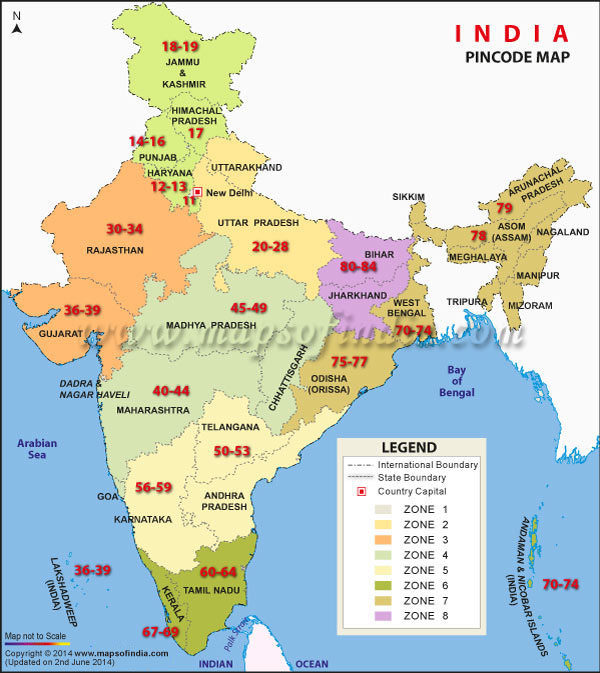

In [3]:
Image(filename = "india-pincode-map.jpg", width = 400, height = 600)

In [4]:
rainbydistrict = pd.read_csv('district wise rainfall normal.csv')

In [5]:
rainfallindia = pd.read_csv('rainfall in india 1901-2015.csv')

In [6]:
fulfillment_center = pd.read_csv('fulfilment_center_info.csv')

In [7]:
rainfallindia.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [8]:
rainfallindia = rainfallindia.loc[rainfallindia['YEAR'] >= 2012]

In [9]:
rainfallindia.head(50)#the problem is I have the subdivision name and not the Region Code so I need to match them

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
106,ANDAMAN & NICOBAR ISLANDS,2012,119.9,45.6,30.9,55.8,533.9,458.2,317.3,369.6,868.9,209.7,300.5,187.3,3497.6,165.6,620.5,2014.0,697.5
107,ANDAMAN & NICOBAR ISLANDS,2013,67.1,37.6,43.0,46.3,509.3,777.0,564.8,336.7,473.6,455.8,354.2,92.3,3757.8,104.7,598.6,2152.1,902.4
108,ANDAMAN & NICOBAR ISLANDS,2014,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,2622.4,50.5,249.1,1618.7,704.2
109,ANDAMAN & NICOBAR ISLANDS,2015,126.8,7.6,3.1,138.2,331.9,346.4,328.9,480.0,523.3,252.1,236.3,129.9,2904.6,134.4,473.2,1678.6,618.4
203,ARUNACHAL PRADESH,2012,57.8,35.8,134.2,403.4,187.4,645.8,638.9,316.0,724.9,248.1,22.0,26.2,3440.3,93.6,724.9,2325.6,296.3
204,ARUNACHAL PRADESH,2013,18.5,40.5,115.1,175.1,335.8,290.0,329.6,230.2,316.1,164.1,13.3,14.6,2042.9,59.0,626.0,1165.9,192.0
205,ARUNACHAL PRADESH,2014,19.0,101.9,80.3,86.7,299.0,415.8,392.4,599.6,343.0,35.1,20.1,10.2,2403.2,120.9,466.0,1750.8,65.4
206,ARUNACHAL PRADESH,2015,30.8,47.5,97.5,287.1,238.9,637.9,329.3,595.5,374.2,65.2,33.8,29.8,2767.5,78.3,623.5,1936.9,128.8
318,ASSAM & MEGHALAYA,2012,15.2,6.9,28.8,279.1,185.8,729.7,444.3,289.2,411.6,199.4,17.1,2.3,2609.4,22.1,493.7,1874.8,218.8
319,ASSAM & MEGHALAYA,2013,1.1,9.6,44.0,112.8,346.7,286.2,367.8,289.7,229.3,126.3,1.0,2.0,1816.4,10.7,503.5,1172.9,129.3


In [10]:
rainfallindia['SUBDIVISION'].values

array(['ANDAMAN & NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS',
       'ANDAMAN & NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS',
       'ARUNACHAL PRADESH', 'ARUNACHAL PRADESH', 'ARUNACHAL PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM & MEGHALAYA', 'ASSAM & MEGHALAYA',
       'ASSAM & MEGHALAYA', 'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'NAGA MANI MIZO TRIPURA', 'NAGA MANI MIZO TRIPURA',
       'NAGA MANI MIZO TRIPURA', 'SUB HIMALAYAN WEST BENGAL & SIKKIM',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'GANGETIC WEST BENGAL', 'GANGETIC WEST BENGAL',
       'GANGETIC WEST BENGAL', 'ORISSA', 'ORISSA', 'ORISSA', 'ORISSA',
       'JHARKHAND', 'JHARKHAND', 'JHARKHAND', 'JHARKHAND', 'BIHAR',
       'BIHAR', 'BIHAR', 'BIHAR', 'EAST UTTAR PRADESH',
       'EAST UTTAR PRADESH', 'EAST UTTAR PRADESH', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'WEST UTTAR PR

In [11]:
fulfillment_center['city_code'].values

array([679, 590, 590, 648, 632, 553, 593, 693, 526, 562, 699, 699, 526,
       478, 576, 526, 713, 654, 515, 647, 676, 698, 628, 526, 680, 620,
       604, 647, 649, 596, 590, 522, 675, 526, 576, 526, 590, 593, 473,
       556, 659, 541, 577, 683, 638, 700, 456, 695, 602, 526, 522, 703,
       526, 651, 638, 590, 590, 485, 685, 461, 702, 615, 590, 590, 614,
       599, 579, 517, 609, 517, 658, 561, 590, 604, 614, 676, 638],
      dtype=int64)

""""""UTTAR PRATESH REGION = 23
Agra division	Agra	
Agra, Firozabad, Mainpuri and Mathura

Aligarh division	Aligarh	
Aligarh, Etah, Hathras and Kasganj

Ayodhya division	Ayodhya	
Ambedkar Nagar, Barabanki, Ayodhya, Sultanpur and Amethi

Azamgarh division	Azamgarh	
Azamgarh, Ballia and Mau

Bareilly division	Bareilly	
Badaun, Bareilly, Pilibhit and Shahjahanpur

Basti division	Basti	
Basti, Sant Kabir Nagar and Siddharthnagar

Chitrakoot division	Chitrakoot	
Banda, Chitrakoot, Hamirpur and Mahoba

Devipatan division	Gonda	
Bahraich, Balarampur, Gonda and Shravasti

Gorakhpur division	Gorakhpur	
Deoria, Gorakhpur, Kushinagar and Maharajganj

Jhansi division	Jhansi	
Jalaun, Jhansi and Lalitpur

Kanpur division	Kanpur Nagar	
Auraiya, Etawah, Farrukhabad, Kannauj, Kanpur Dehat and Kanpur Nagar

Lucknow division	Lucknow	
Hardoi, Lakhimpur Kheri, Lucknow, Raebareli, Sitapur and Unnao

Meerut division	Meerut	
Baghpat, Bulandshahar, Gautam Buddha Nagar, Ghaziabad, Meerut and Hapur

Mirzapur division	Mirzapur	
Mirzapur, Sant Ravidas Nagar and Sonbhadra

Moradabad division	Moradabad	
Bijnor, Amroha, Moradabad, Rampur and Sambhal

Prayagraj division	Prayagraj	
Prayagraj, Fatehpur, Kaushambi and Pratapgarh

Saharanpur division	Saharanpur	
Muzaffarnagar, Saharanpur and Shamli

Varanasi division	Varanasi

West Bengal = 77

Presidency division	Kolkata	
Howrah, Kolkata, Nadia, North 24 Parganas and South 24 Parganas

Medinipur division	Paschim Medinipur	
Bankura, Jhargram, Paschim Medinipur, Purba Medinipur and Purulia

Malda division	Malda	
Dakshin Dinajpur, Malda, Murshidabad and Uttar Dinajpur

Burdwan division	Hooghly	
Birbhum, Hooghly, Paschim Bardhaman and Purba Bardhaman

Jalpaiguri division	Jalpaiguri	
Alipurduar, Cooch Behar, Darjeeling, Jalpaiguri and Kalimpong""""""

In [ ]:
# Delhi= 93
Delhi division	Central Delhi	
Central Delhi, East Delhi, New Delhi, North Delhi, North East Delhi, North West Delhi, Shahdara, South Delhi, South East Delhi, South West Delhi and West Delhi

In [ ]:
# Kshmir = 85
Jammu and Kashmir	Jammu Division	Jammu	Jammu, Doda, Kathua, Kishtwar, Poonch, Rajouri, Ramban, Reasi, Samba and Udhampur
Kashmir Division	Srinagar	Srinagar, Anantnag, Bandipora, Baramulla, Budgam, Ganderbal, Kulgam, Kupwara, Pulwama and Shopian

In [ ]:
23 = Uttarakhand	Kumaon division	Nainital	
Almora, Bageshwar, Champawat, Nainital, Pithoragarh and Udham Singh Nagar

Garhwal division	Pauri Garhwal	
Chamoli, Dehradun, Haridwar, Pauri Garhwal, Rudraprayag, Tehri Garhwal and Uttarkashi

In [ ]:
Maharashtra = 56

Amravati division	Amravati	
Akola, Amravati, Buldana, Yavatmal and Washim

Aurangabad division	Aurangabad	
Aurangabad Beed, Jalna, Osmanabad, Nanded, Latur, Parbhani and Hingoli

Konkan division	Thane	
Mumbai City, Mumbai Suburban, Thane, Palghar, Raigad, Ratnagiri and Sindhudurg

Nagpur division	Nagpur	
Bhandara, Chandrapur, Gadchiroli, Gondia, Nagpur and Wardha

Nashik division	Nashik	
Ahmednagar, Dhule, Jalgaon, Nandurbar and Nashik

Pune division	Pune	
Kolhapur, Pune, Sangli, Satara and Solapur

In [ ]:
rainfallindia['REGION_CODE'] =  ""

In [ ]:
rainfallindia['REGION_CODE'] = np.where(rainfallindia.SUBDIVISION == 'WEST UTTAR PRADESH','23',rainfallindia.REGION_CODE)

In [ ]:
rainfallindia.head(25)
                

In [ ]:
rainfallindia.info
rainfallindia.isnull().sum()

In [ ]:
#This data set, once organized by REGION CODE needs to then be alligned with the 2 dataset(2) below

In [18]:
total_df = pd.read_csv('train1.csv') # (this is the meal info + fullfillment center data) #REVIEW to see how I can match up weeks to the weather data I have

In [19]:
total_df.head(5)

,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [20]:
addins_df = pd.read_csv('fulfillment_center1a') # I added both ORDER TECHNOLOGY and POPULATION to this DF

In [21]:
addins_df.head(5)

,Unnamed: 0,center_id,city_code,region_code,center_type,op_area,Order_Technology,Region_Population
0,0,11,679,56,TYPE_A,3.7,Phone App,7987640
1,1,13,590,56,TYPE_B,6.7,Telephone,7987640
2,2,124,590,56,TYPE_C,4.0,Web Interface,7987640
3,3,66,648,34,TYPE_A,4.1,Phone App,5387946
4,4,94,632,34,TYPE_C,3.6,Web Interface,5387946


#DISREGARD BELOW

In [ ]:
Geography = fulfillment_center[['city_code', 'region_code']]
Geography.head(12)

In [ ]:
fulfillment_center['region_code'].values

In [ ]:
fulfillment_center['city_code'].values

#not needed as it shows the total rain by District without dates

In [ ]:
rainbydistrict.head(100)

In [ ]:
fulfillment_center['Region_Population'] = np.where(fulfillment_center.region_code == 85,'4589023',fulfillment_center.Region_Population)

In [ ]:
fulfillment_center['Region_Rainfall'] =  ""

In [ ]:
fulfillment_center['Region_Rainfall'] = np.where(fulfillment_center.Region_Rainfall == 23,'4589023',fulfillment_center.Region_Population)

In [ ]:
https://www.ncdc.noaa.gov/cdo-web/

In [ ]:
import requests #using open weather app to pull data
#paid https://openweathermap.org/price

api_address='http://api.openweathermap.org/data/2.5/weather?appid=0c42f7f6b53b244c78a418f4f181282a&q='
city = input('City Name :')
url = api_address + city
json_data = requests.get(url).json()
format_add = json_data['base']
print(format_add)

In [ ]:
https://www.ncdc.noaa.gov/cdo-web/webservices/v2

In [ ]:
#event portal https://events.indiaonline.in/

In [ ]:
https://data.gov.in/catalog/district-rainfall-normal-mm-monthly-seasonal-and-annual-data-period-1951-2000

In [ ]:
district wise rainfall normal.csv

In [ ]:
fulfillment_center['region_code'].values

Saturday, November 14 is when Dawahli is celebrated